# Introduction

## Topic

In the age of information, the proliferation of fake news has become a significant societal challenge. Machine learning, with its ability to analyze vast amounts of data and recognize intricate patterns, has emerged as a powerful tool for detecting fake news. The process of fake news detection involves leveraging various techniques to distinguish between genuine and fabricated information. One fundamental approach to fake news detection involves feature engineering, where relevant characteristics of the text are extracted to train machine learning models. Features can include linguistic cues, such as the frequency of certain words, sentiment analysis, and syntactic structures. Additionally, metadata, like the source of the news and the publication date, can provide valuable context for model training. Supervised learning techniques are commonly employed in fake news detection. These models are trained on labeled datasets, where each piece of news is annotated as real or fake. Classification algorithms, such as Support Vector Machines (SVM), Random Forests, or more advanced methods like deep neural networks, learn to distinguish patterns in the data and make predictions on the authenticity of unseen news articles. Natural Language Processing (NLP) plays a pivotal role in fake news detection. NLP techniques enable machines to understand and interpret human language, facilitating the extraction of meaningful features for analysis. Sentiment analysis, topic modeling, and semantic analysis contribute to a nuanced understanding of the text, aiding in the identification of deceptive patterns. Unsupervised learning approaches are also explored, especially in scenarios where labeled data is scarce. Clustering techniques, anomaly detection, and network analysis can uncover patterns that deviate from the norm, signaling potential instances of fake news. However, the challenge lies in defining what constitutes a 'normal' pattern, and these methods may require fine-tuning to achieve optimal performance. The evolution of fake news tactics necessitates adaptive models. Transfer learning, where models pretrained on large datasets are fine-tuned for fake news detection, proves effective in learning generalized features. This enables the model to discern subtle patterns and adapt to emerging trends in deceptive information. Ensuring the robustness and ethical deployment of fake news detection models is paramount. Addressing issues of bias, interpretability, and transparency in machine learning models is an ongoing area of research. Striking a balance between accuracy and avoiding censorship of legitimate content remains a challenge, underscoring the interdisciplinary nature of fake news detection, which involves not only machine learning but also considerations from the fields of journalism, ethics, and information studies.

### Objective

The goal of this project is to develop a machine learning model capable of detecting fake news articles based on their title by leveraging the power of Long Short-Term Memory (LSTM) networks.

### Dataset

A labeled dataset consisting of both fake and real news articles was collected for training and evaluation. The dataset is preprocessed to clean and transform the text data into a format suitable for training the LSTM model.
Dataset source: https://github.com/KaiDMML/FakeNewsNet
Described in the following paper:
Shu, Kai, Deepak Mahudeswaran, Suhang Wang, Dongwon Lee, and Huan Liu. ‘FakeNewsNet: A Data Repository with News Content, Social Context and Spatialtemporal Information for Studying Fake News on Social Media’, 2019.


### Data Preprocessing

Text data preprocessing involves converting text to lowercase, removing special characters, numbers, and punctuation, tokenization, and padding to ensure uniform input sizes for the LSTM model.

### Model Architecture

The LSTM model architecture is designed to capture sequential dependencies and long-term patterns in the text. It includes an Embedding layer for word representation, LSTM layers for sequential processing, and an output layer with a sigmoid activation function for binary classification.

Long Short-Term Memory (LSTM) networks stand out as a crucial advancement in the realm of recurrent neural networks (RNNs), introduced by Sepp Hochreiter and Jürgen Schmidhuber in 1997. LSTMs are specifically engineered to tackle the challenge of learning long-term dependencies in sequential data, a task that conventional neural networks often struggle with due to their limited ability to retain information over extended sequences.
At the core of LSTM architecture are memory cells, functioning as reservoirs for storing information over time. These cells play a pivotal role in capturing and preserving long-term dependencies in sequential data. The architectural innovation lies in the incorporation of gates, namely the input gate, forget gate, and output gate, which collectively enable the network to regulate the flow of information.
The input gate governs the selection of information from the current input to be stored in the memory cell. Simultaneously, the forget gate manages the removal of unnecessary or outdated information from the memory cell. This dynamic control over information flow allows LSTMs to selectively retain relevant details over extended sequences. The third component, the output gate, decides which parts of the memory cell should contribute to the output at a given time step. This output, in the form of a hidden state, encapsulates a condensed representation of the information contained in the memory cell.
The LSTM process unfolds iteratively at each time step of a sequence. The network takes an input, receives the hidden state and cell state from the preceding time step, and processes the input through the input gate. The cell state, akin to a conveyor belt, transports information across various time steps, facilitating the network's ability to capture and remember crucial details over long sequences. The hidden state derived from the output gate is then employed for making predictions or transmitted to subsequent LSTM units in the sequence

### Training the Model

The LSTM model is trained on the labeled dataset using appropriate loss functions, optimizers, and evaluation metrics (e.g., accuracy). During training, the model learns to distinguish between fake and real news based on the provided features.

### Evaluation

The trained model is evaluated on a separate validation set to assess its generalization performance. Metrics such as accuracy, and precision are considered to gauge the model's effectiveness in distinguishing between fake and real news.

### Prediction and Thresholding

Once trained, the model is used to predict the authenticity of new news articles. Predictions are made by feeding preprocessed text through the model, and a threshold is applied to classify articles as fake or real based on the predicted probabilities.

## Deployment

Because this is a student project the final trained model is not deployed in a production environment.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk
import re
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


Additionally, use NLTK language resources, such as corpora, lexical resources, grammars, etc., to support its functionalities. These resources are essential for tasks like text processing, analysis, and natural language understanding.

Corpora: Corpora are large bodies of text used for linguistic research and analysis. NLTK includes various corpora for different languages and domains. In your code, you are downloading and extracting WordNet, which is a lexical database of the English language.

Punkt: Punkt is a pre-trained unsupervised machine learning model for tokenizing sentences. It helps NLTK to accurately split text into sentences.

WordNet: WordNet is a lexical database of the English language that relates words to one another in terms of synonyms, hypernyms, hyponyms, and more. It is a valuable resource for tasks such as word sense disambiguation and semantic analysis.

Stopwords: NLTK includes a list of common stop words for different languages. Stop words are frequently used words (e.g., "the," "is," "and") that are often removed from text during natural language processing tasks because they typically don't carry significant meaning.

In [2]:

nltk.download('punkt',download_dir="../kaggle/working/")
nltk.download('wordnet',download_dir="../kaggle/working/")
nltk.download('stopwords',download_dir="../kaggle/working/")
nltk.data.path.append('../kaggle/working/')

with zipfile.ZipFile("../kaggle/working/corpora/wordnet.zip", 'r') as zip_f:
    zip_f.extractall("../kaggle/working/corpora/")


[nltk_data] Downloading package punkt to ../kaggle/working/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ../kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to ../kaggle/working/...
[nltk_data]   Package stopwords is already up-to-date!


# Import Dataset

First I load the dataset from local FakeNewsNet.csv file. The dropna method is used to remove any rows with missing values (NaN) from the DataFrame. The inplace=True parameter modifies the original DataFrame in place, meaning that the changes are applied directly to the df DataFrame. reset_index resets the index of the DataFrame after dropping rows with missing values. The inplace=True parameter again modifies the DataFrame in place.
Here, the drop method is used to remove specific columns from the DataFrame. The columns to be dropped are specified in a list (["index","news_url","source_domain","tweet_num"]). The axis=1 parameter indicates that these are columns (not rows), and inplace=True ensures that the changes are applied directly to the DataFrame.



C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


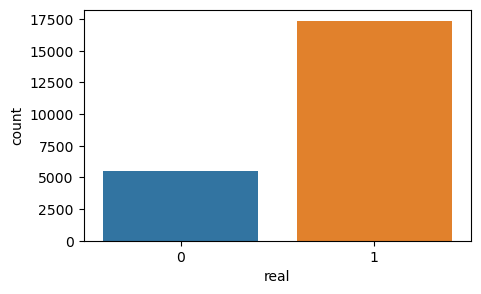

In [3]:
df = pd.read_csv("FakeNewsNet.csv")
df

df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(["index","news_url","source_domain","tweet_num"],axis=1,inplace=True)
df.head()
plt.figure(figsize=(5, 3))  # Set the size of the figure
sns.countplot(data=df, x="real")
plt.show()

In [4]:
# Alternative dataset - similar results
"""
dfa = pd.read_csv("combined.csv")
dfa.dropna(inplace=True)

dfa['titletext'] = dfa.title + "_" + dfa.text
dfa.drop(["id", "title","text","author"],axis=1,inplace=True)
dfa.rename(columns={'titletext': 'title'}, inplace=True)
dfa.rename(columns={'label': 'real'}, inplace=True)

dfa.head(10)

plt.figure(figsize=(5, 3))  # Set the size of the figure
sns.countplot(data=dfa, x="real")
plt.show()"""

'\ndfa = pd.read_csv("combined.csv")\ndfa.dropna(inplace=True)\n\ndfa[\'titletext\'] = dfa.title + "_" + dfa.text\ndfa.drop(["id", "title","text","author"],axis=1,inplace=True)\ndfa.rename(columns={\'titletext\': \'title\'}, inplace=True)\ndfa.rename(columns={\'label\': \'real\'}, inplace=True)\n\ndfa.head(10)\n\nplt.figure(figsize=(5, 3))  # Set the size of the figure\nsns.countplot(data=dfa, x="real")\nplt.show()'

# Data Preprocessing

During the data preprocessing step the textual data from the csv is used to create a numerical representation of the text.  Word2Vec from the Gensim library is then used to train word embeddings.

In [5]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

This creates an instance of the WordNetLemmatizer from the nltk library. Lemmatization is a process of reducing words to their base or root form.
It applies the lemTitles function to each element in the "title" column of the news_data DataFrame. The result is then assigned back to the "title" column.
Then preprocess the "title" column of a DataFrame by tokenizing, cleaning, lemmatizing, and removing stopwords from the text. The lemmatization is performed using the WordNetLemmatizer from the nltk library.

Most common words:
kardashian: 1138
new: 1056
star: 932
jennifer: 768
2018: 759
jenner: 747
say: 731
baby: 725
kim: 710
award: 689


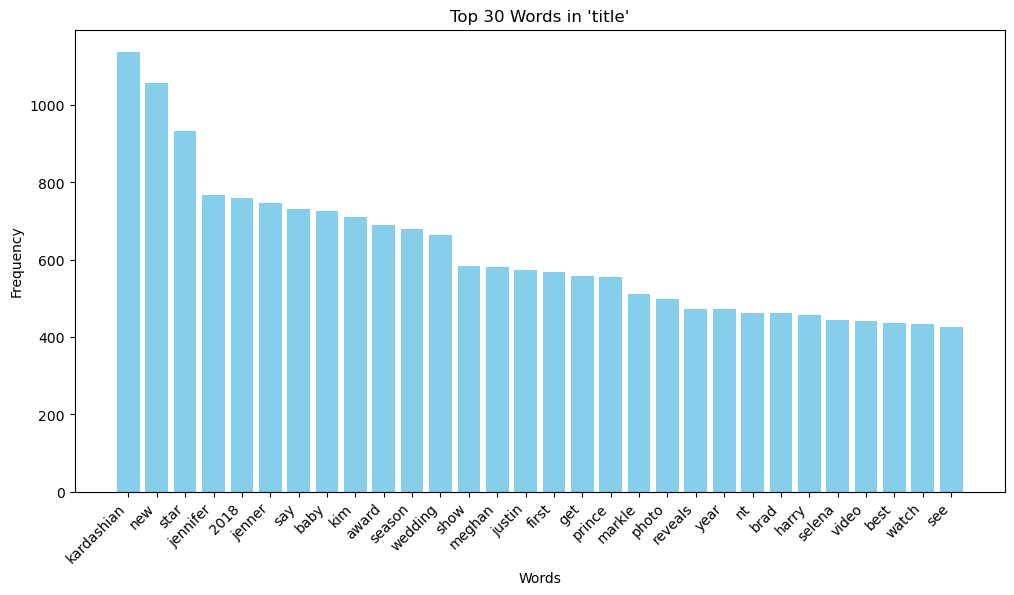

In [6]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemTitles(title):
    words = nltk.word_tokenize(title)
    words = [re.sub("[^a-zA-Z0-9]","",i).lower().strip() for i in words]
    words = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]
    title = " ".join(words)
    return title

df["title"] = df["title"].apply(lemTitles)
df.head()

dfplot = df
text_data = ' '.join(dfplot['title'].dropna())
# Tokenize the text into words
tokens = word_tokenize(text_data)

# Calculate word frequencies
fdist = FreqDist(tokens)

# Display the most common words
print("Most common words:")
for word, frequency in fdist.most_common(10):
    print(f"{word}: {frequency}")

# Plot a bar chart of word frequencies
plt.figure(figsize=(12, 6))
common_words = fdist.most_common(30)
words, frequencies = zip(*common_words)
plt.bar(words, frequencies, color='skyblue')
plt.title(f"Top 30 Words in 'title'")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
VOCAB_SIZE = 10000
DIMENSION = 100
MAXLEN = 20

In [8]:
y = df["real"].values
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df["title"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

import gensim
# EMBEDDING_DIM = 100

# w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=EMBEDDING_DIM, window=5, min_count=1)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
print(len(word_index))

16612


In [10]:
# w2v_model.wv["computer"]


In [11]:
# w2v_model.wv.most_similar("computer")


In [12]:
def oneHot(title):
    return tf.keras.preprocessing.text.one_hot(title,VOCAB_SIZE)

df["title"] = df["title"].apply(oneHot)

For each word in the input text, the one_hot function assigns a unique integer between 0 and VOCAB_SIZE-1.
The result is a list of integers, where the length of the list is equal to the number of words in the input text.

In [13]:
df.head(100)


,title,real
0,"[5223, 7432, 8656, 7658, 9076, 3150, 8723, 114...",1
1,"[8750, 1575, 6251, 3176, 771, 687, 2510, 8908]",1
2,"[5795, 6030, 5028, 5687, 2022, 8530, 9198, 954...",1
3,"[1022, 4199, 5713, 5846, 7340, 9082, 6014, 3017]",1
4,"[8881, 7637, 1152, 9719, 3698, 2954, 2526, 329...",1
...,...,...
95,"[1369, 9808, 4806, 9739, 2180, 5314, 7134, 568...",1
96,"[762, 3381, 8472, 1993, 5463, 6505, 5201, 4918...",0
97,"[1936, 8278, 3958, 3879, 7386, 8730]",1
98,"[8937, 7763, 7332, 9219, 2809, 3327, 6623, 2274]",1


In [14]:
df.shape

(22866, 2)

In [15]:
data = pd.DataFrame(tf.keras.utils.pad_sequences(df["title"],padding="pre",maxlen=MAXLEN))
data.shape

(22866, 20)

In [16]:
df = pd.concat((df,data),axis=1)
df.shape

(22866, 22)

In [17]:
df.head(10)

,title,real,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,"[5223, 7432, 8656, 7658, 9076, 3150, 8723, 114...",1,0,0,0,0,0,0,0,0,...,5223,7432,8656,7658,9076,3150,8723,1145,1125,50
1,"[8750, 1575, 6251, 3176, 771, 687, 2510, 8908]",1,0,0,0,0,0,0,0,0,...,0,0,8750,1575,6251,3176,771,687,2510,8908
2,"[5795, 6030, 5028, 5687, 2022, 8530, 9198, 954...",1,0,0,0,0,0,0,5795,6030,...,2022,8530,9198,9548,5783,2514,3362,3964,3937,4605
3,"[1022, 4199, 5713, 5846, 7340, 9082, 6014, 3017]",1,0,0,0,0,0,0,0,0,...,0,0,1022,4199,5713,5846,7340,9082,6014,3017
4,"[8881, 7637, 1152, 9719, 3698, 2954, 2526, 329...",1,0,0,0,0,0,0,8881,7637,...,3698,2954,2526,3296,447,635,9655,4921,3917,4411
5,"[6732, 5475, 2179, 4497, 375, 1057, 8098, 3668...",0,0,0,0,0,0,0,0,0,...,0,6732,5475,2179,4497,375,1057,8098,3668,7988
6,"[4909, 4930, 6596, 8570, 1158, 6622]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,4909,4930,6596,8570,1158,6622
7,"[5052, 9843, 3711, 1127, 189, 9011, 1291, 4183...",0,0,0,0,0,0,0,0,0,...,5052,9843,3711,1127,189,9011,1291,4183,5172,8322
8,"[239, 6198, 6466, 5233, 481, 708, 7681, 9430, ...",1,0,0,0,0,0,0,0,0,...,239,6198,6466,5233,481,708,7681,9430,4957,63
9,"[5043, 4921, 3689, 9036, 266, 1511]",1,0,0,0,0,0,0,0,0,...,0,0,0,0,5043,4921,3689,9036,266,1511


# Modeling

 I used the scikit-learn library to split a dataset into training and testing sets. Additionally, a set of columns (cols) is used to define features for the machine learning model.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, confusion_matrix

cols = [i for i in range(0,20)]
seed = np.random.seed(6)

X = df[cols]
y = df["real"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=seed)

This line initializes a sequential model, which is a linear stack of layers.
This line adds an Embedding layer to the model. This layer is often used in natural language processing tasks to map words to dense vectors of fixed size. The parameters are as follows:

VOCAB_SIZE: The size of the vocabulary, which is the number of unique words in the dataset.
DIMENSION: The dimensionality of the embedding vectors.
input_length: The length of the input sequences, which is set to the number of columns (len(cols)) in the feature set.
This line adds a Bidirectional LSTM layer with 128 units. Bidirectional LSTMs process the input sequences from both forward and backward directions, which can capture contextual information effectively. The return_sequences=True parameter means that the layer returns the full sequence of outputs for each input sequence.

This line adds a Dropout layer, which helps prevent overfitting by randomly setting a fraction of input units to zero during training.

The compile method configures the model for training. It specifies the optimizer, loss function, and metrics to be used during training. Here, the Adam optimizer is used, binary crossentropy is chosen as the loss function for binary classification, and accuracy is chosen as the evaluation metric.



In [19]:
def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

# Define the model
model = Sequential()
# embedding_vectors = get_weight_matrix(w2v_model.wv, word_index)
# [embedding_vectors]
model.add(tf.keras.layers.Embedding(VOCAB_SIZE,DIMENSION,input_length=len(cols)))

# Bidirectional LSTM layer with return_sequences=True
model.add(Bidirectional(LSTM(128, return_sequences=True)))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128)))

# Dropout layer
model.add(Dropout(0.2))

# Dense layer with sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           1000000   
                                                                 
 bidirectional (Bidirection  (None, 20, 256)           234496    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 20, 256)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                

monitor: The metric to monitor for early stopping. In this case, it's set to "val_accuracy," which means it monitors the validation accuracy.
patience: The number of epochs with no improvement after which training will be stopped. If the validation accuracy does not improve for three consecutive epochs (patience=3), training will stop.
restore_best_weights: If set to True, the model weights will be restored to the best values observed during training.

 trains the model using the training data (X_train, y_train) and validates on the test data (X_test, y_test). The training process is configured to run for a maximum of 20 epochs, with a batch size of 64.

The callbacks parameter is used to include the EarlyStopping callback during training. This means that the training process will monitor the validation accuracy, and if it doesn't improve for three consecutive epochs, training will be stopped, and the model weights will be restored to the best observed values.

The training history, including loss and accuracy metrics for each epoch, will be stored in the history variable. This information can be useful for analyzing the model's performance over time and making decisions about further training or model adjustments.

In [21]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3,restore_best_weights=True,)

history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64, callbacks=[earlyStopping])

Epoch 1/20


268/268 [==============================] - 10s 25ms/step - loss: 0.4381 - accuracy: 0.8127 - val_loss: 0.3848 - val_accuracy: 0.8396
Epoch 2/20
268/268 [==============================] - 6s 23ms/step - loss: 0.3176 - accuracy: 0.8658 - val_loss: 0.3855 - val_accuracy: 0.8345
Epoch 3/20
268/268 [==============================] - 6s 23ms/step - loss: 0.2563 - accuracy: 0.8950 - val_loss: 0.4104 - val_accuracy: 0.8254
Epoch 4/20
268/268 [==============================] - 6s 23ms/step - loss: 0.1984 - accuracy: 0.9223 - val_loss: 0.4910 - val_accuracy: 0.8195


# Model Evaluation

In [22]:
df = pd.DataFrame(history.history)
df_loss = df[['loss', 'val_loss']]
df_acc =  df[['accuracy', 'val_accuracy']]

C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

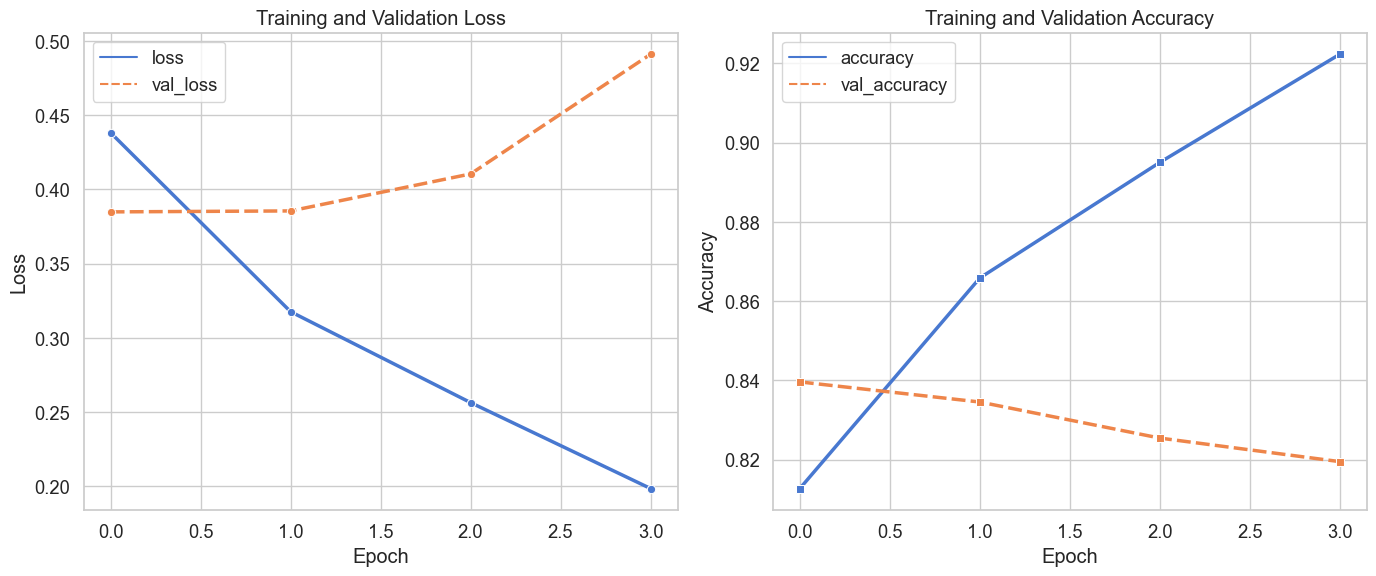

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.lineplot(data=df_loss, ax=axes[0], linewidth=2.5, color='blue', linestyle='-', marker='o')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

sns.lineplot(data=df_acc, ax=axes[1], linewidth=2.5, color='green', linestyle='--', marker='s')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()

plt.savefig('LSTM_Training and Validation Loss_Accuracy.png')

plt.show()


Training Loss vs. Validation Loss:

Training Loss: This is the loss calculated on the training data during each epoch of training. It represents how well the model is fitting the training data.
Validation Loss: This is the loss calculated on a separate validation dataset (not used during training) during each epoch. It indicates how well the model is generalizing to new, unseen data.
Relationship:

In an ideal scenario, both training and validation loss decrease during training, indicating that the model is learning from the data and generalizing well. However, if the training loss continues to decrease while the validation loss starts to increase, it may indicate overfitting, where the model is memorizing the training data but not generalizing well to new data.
Training Accuracy vs. Validation Accuracy:

Training Accuracy: This is the accuracy calculated on the training data during each epoch. It represents the proportion of correctly classified instances in the training set.
Validation Accuracy: This is the accuracy calculated on the validation dataset during each epoch. It indicates the model's ability to correctly classify instances in new, unseen data.
Relationship:

Similar to loss, in an ideal scenario, both training and validation accuracy increase during training. However, if the training accuracy is significantly higher than the validation accuracy, it may indicate overfitting.

Calculates a confusion matrix based on binary predictions from the model and visualizes it using a heatmap. The confusion matrix helps in assessing the performance of the model by showing the counts of true positives, true negatives, false positives, and false negatives.


179/179 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 682  686]
 [ 231 4118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      1368
           1       0.86      0.95      0.90      4349

    accuracy                           0.84      5717
   macro avg       0.80      0.72      0.75      5717
weighted avg       0.83      0.84      0.83      5717



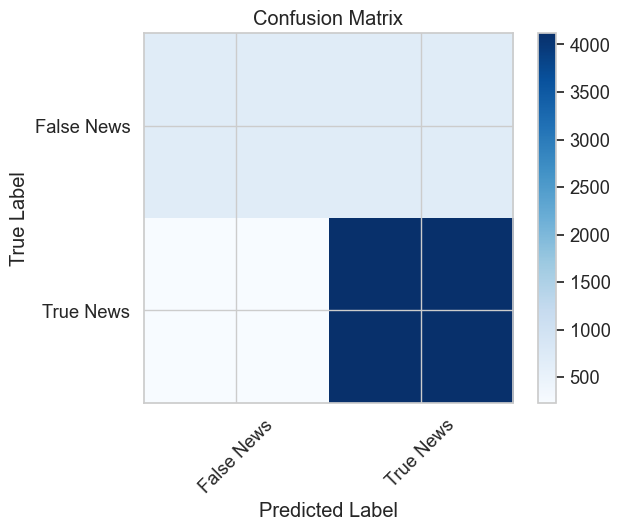

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test)

threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(np.int32)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cnf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.imshow(cnf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

classes = ["False News", "True News"]  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.savefig('LSTM_Confusion Matrix.png')

plt.show()


TP (True Positive): News articles correctly identified as fake.
TN (True Negative): News articles correctly identified as not fake.
FP (False Positive): News articles incorrectly identified as fake.
FN (False Negative): News articles incorrectly identified as not fake.

# Conclusion

In conclusion, this paper has delved into the realm of fake news detection, employing LSTM (Long Short-Term Memory) models as a sophisticated tool for this task. The investigation has revealed promising results in terms of accuracy, showcasing the model's ability to discern between authentic and deceptive information with a commendable precision.
However, a critical observation emerges in the form of overfitting, highlighting a significant challenge in the current model implementation. The overfitting phenomenon is attributed to the scarcity of training data. As the LSTM model tends to memorize patterns within the limited dataset rather than generalizing well to new, unseen data, its performance may not be as robust in real-world scenarios with diverse and evolving information.
This revelation underscores the importance of addressing the data limitations to enhance the model's robustness and generalizability. Future endeavors should focus on augmenting the dataset, ensuring a more comprehensive representation of various linguistic nuances and deceptive tactics employed in the dissemination of fake news.
Moreover, fine-tuning the hyperparameters and exploring regularization techniques can serve as valuable strategies to mitigate overfitting without compromising the model's high accuracy. Striking a balance between model complexity and the available data will be pivotal in achieving a more resilient and reliable fake news detection system.
In essence, while the LSTM models have showcased their prowess in discerning the authenticity of information, the journey towards a more effective and practical solution involves a concerted effort to amass diverse and ample data, coupled with meticulous model optimization. Only through such holistic advancements can we harness the true potential of LSTM models in the relentless pursuit of combating fake news in the digital landscape.